In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Python

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [1]:
a = float(input('Enter a: '))
d = float(input('Enter d: '))
N = int(input('Enter N: '))
for i in range(N):
  a += d
print(a)

Enter a: 1
Enter d: 1
Enter N: 2
3.0


**Task 2** (0.5 points) <br/> 
Enter a number `N`. Find sum of the first `N` memebers of harmonic series.

In [4]:
N = int(input('Enter N: '))
ans = 0
for i in range(1,N+1):
  ans += 1/i
print(ans)

Enter N: 6
2.4499999999999997


**Task 3** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [9]:
def is_prime(N):
  ans = True
  for i in range(2,N):
    if N % i == 0:
      return False
  return True

N = int(input('Enter N: '))
print(is_prime(N))

Enter N: 47
True


**Task 4** (0.5 points) <br/> 
Enter the first `N` prime numbers.

In [14]:
N = int(input('Enter N: '))
i = 1
while N > 0:
  if is_prime(i):
    N -= 1
    print(i)
  i += 1

Enter N: 5
1
2
3
5
7


**Task 5** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the maximum number.

In [21]:
a, b, c = [float(input('Enter {} number: '.format(x))) for x in range(1,4)]
a = a if a > b else b
print(a if a > c else c)

Enter 1 number: 203
Enter 2 number: 152512
Enter 3 number: 2324
152512.0


# 2. Numpy

**Task 1** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}$$


In [43]:
a = np.random.rand(3)
b = np.random.rand(3)
print("Euclidean Distance: ", np.linalg.norm(a-b))
print("Manhattan Distance: ", np.abs(a-b).sum())
print("Cosine Distance: ", 1 - a.T @ b / (np.linalg.norm(a) * np.linalg.norm(a)))

Euclidean Distance:  0.8230680676491637
Manhattan Distance:  1.2151999887502
Cosine Distance:  0.31419423313913897


**Task 2** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 10 and with sum of its elements equals to 2.

In [56]:
a = np.random.rand(10)
a /= (a.sum() / 2)
a.sum()

2.0

**Task 3** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 100. Transform the array so, that 
* Maximum element(s) value is 1
* Minimum element(s) value is 0
* Other values are in interval 0-1 with keeping the order

In [0]:
a = np.random.rand(100)
a -= a.min()
a *= 1 / a.max()
assert a.min() == 0
assert a.max() == 1

**Task 4** (0.5 points) <br/>
Create a random array with length of 20 with integers from [0,50]. Select elements that are smaller than 5th percentile and larger than 95th percentile

In [83]:
a = np.random.randint(0, high=51, size=(20))
per5 = np.percentile(a, 5)
per95 = np.percentile(a, 95)
smaller = []
larger = []
for i in a:
  if i > per95:
    larger.append(i)
  elif i < per5:
    smaller.append(i)

print('Elements that are smaller then 5th percentile: ', smaller)
print('Elements that are larger then 95th percentile: ', larger)

Elements that are smaller then 5th percentile:  [8]
Elements that are larger then 95th percentile:  [44]


**Task 5** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integer from [0,50]. Print a column that contains the maximum element of the array.

In [108]:
a = np.random.randint(0, high=51, size=(5,6))
print(a)
print('\nA column with maximum element: ', a[:,a.argmax() % a.shape[1]])

[[ 2  4 45  5 28 20]
 [46 33  2 47 28 27]
 [32 35  6 45 23  3]
 [32 48 23 37 27 30]
 [28 13 25 28 50 18]]

A column with maximum element:  [28 28 23 27 50]


**Task 6** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [131]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan
arr

array([0.43158377,        nan, 0.25697719, 0.54443566,        nan,
       0.31365526, 0.70669769, 0.80632957,        nan, 0.08006958])

In [132]:
nan_mask = np.isnan(arr)
arr[nan_mask] = arr[nan_mask ^ True].mean()
arr

array([0.43158377, 0.44853553, 0.25697719, 0.54443566, 0.44853553,
       0.31365526, 0.70669769, 0.80632957, 0.44853553, 0.08006958])

### Linear Regression

Download [file 1](https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv?dl=0) and [file 2](https://www.dropbox.com/s/f87gm612o144emx/tutorial_dataset_2.csv?dl=0) into a directory with this notebook. Using function `loadtxt` in `numpy` load data from the first file. Assign y = D[:,0] аnd X = D[:, 1:].


We will use one magic formula to find linear regression coefficients. You will prove this formula on your next lectures of the course.

Linear regression model in matrix form looks like: $\hat{y} = X\hat{\beta}$, where

$$ \hat{\beta} = (X^\top X)^{-1} X^\top y $$
Model residuals are calculated as
$$ \text{res} = y - \hat{y} $$


**Task 7** (2.5 points)<br/>
1. Load the data
2. Find parameters $\hat{\beta}$ using the formula above
3. Make a plot with the model residuals on Y axis and $\hat{y}$ on X axis

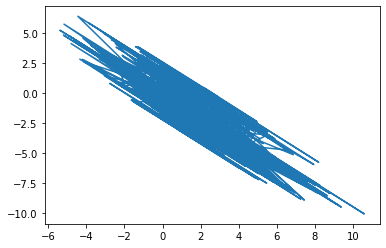

In [143]:
## load data
D = np.loadtxt('tutorial_dataset.csv', 
               skiprows=1, 
               delimiter=',')

## Your code here
y = D[:,0]
X = D[:,1:]
beta = (X.T @ X)**-1 @ X.T @ y
y_predict = X @ beta
res = y - y_predict

plt.plot(y_predict, res)

# 3. Pandas

### Wine Quality

Download [sample](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) with information about wine characteristics and its quality.

In [0]:
## Your code here

**Task 1 ** (1 point) <br/>
* How much objects are in the sample?
* What features describe the objects? How much these features?
* What is feature a target variable?
* What are their ranges?
* Are there any missing values?

In [0]:
## Your code and answers here

**Task 2** (1 point)<br/>
What features affect the target variable the most?

In [0]:
## Your code here